In [1]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time

# record start time
start = time.time()
le = LabelEncoder()

dataset = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/mobile-churn.csv')


df1=dataset[dataset['churn']==0]
df=dataset[dataset['churn']==1]

#filling missing value with mean
df = df.fillna(df.mean())
df=df.drop(['year','month','user_account_id'],axis=1)

#filling missing value with mean
df1 = df1.fillna(df1.mean())
df1=df1.drop(['year','month','user_account_id'],axis=1)

In [ ]:
df

,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,reloads_inactive_days,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
3,1013,0,11,5.62,0.00,1,0,0,0,1276,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
11,769,0,90,30.01,0.00,0,0,0,0,90,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
12,732,0,28,2.42,3.68,1,1,0,0,30,...,15.48,0.0,1.0,0.0,26,0,1,0,0.0,1
20,15885,0,1276,0.00,0.00,0,0,0,0,1276,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
50,15885,0,8,0.00,0.00,1,0,0,0,1276,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66461,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66462,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66463,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66464,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1


In [2]:
pip install ctganenn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu

In [ ]:
from ctganenn import CTGANENN

X,y=CTGANENN(df,df1,38655,'churn')

Gen. (-1.19) | Discrim. (-0.62):  66%|██████▌   | 66/100 [05:55<03:00,  5.30s/it]

In [ ]:
# decision tree
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
model = DecisionTreeClassifier()
# define grid
balance1 = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.993455 using {'class_weight': {0: 100, 1: 100}}
0.993368 (0.000429) with: {'class_weight': {0: 10, 1: 100}}
0.992927 (0.000471) with: {'class_weight': {0: 20, 1: 100}}
0.993104 (0.000459) with: {'class_weight': {0: 30, 1: 100}}
0.993221 (0.000682) with: {'class_weight': {0: 40, 1: 100}}
0.993366 (0.000631) with: {'class_weight': {0: 50, 1: 100}}
0.993171 (0.000707) with: {'class_weight': {0: 60, 1: 100}}
0.993245 (0.000639) with: {'class_weight': {0: 70, 1: 100}}
0.993279 (0.000632) with: {'class_weight': {0: 80, 1: 100}}
0.993403 (0.000580) with: {'class_weight': {0: 90, 1: 100}}
0.993455 (0.000513) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.993292 using {'class_weight': {0: 10, 1: 100}}
0.993292 (0.000426) with: {'class_weight': {0: 10, 1: 100}}
0.992594 (0.000490) with: {'class_weight': {0: 20, 1: 100}}
0.992898 (0.000496) with: {'class_weight': {0: 30, 1: 100}}
0.992876 (0.000558) with: {'class_weight': {0: 40, 1: 100}}
0.993022 (0.000618) with: {'class_weight': {0: 50, 1: 100}}
0.992873 (0.000657) with: {'class_weight': {0: 60, 1: 100}}
0.992773 (0.000673) with: {'class_weight': {0: 70, 1: 100}}
0.993026 (0.000570) with: {'class_weight': {0: 80, 1: 100}}
0.993063 (0.000519) with: {'class_weight': {0: 90, 1: 100}}
0.993044 (0.000612) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

weights = {0:30,1:100}
clf = DecisionTreeClassifier(class_weight=weights)

y_pred = cross_val_predict(clf, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)


[[49314  3248]
 [  774 38351]]


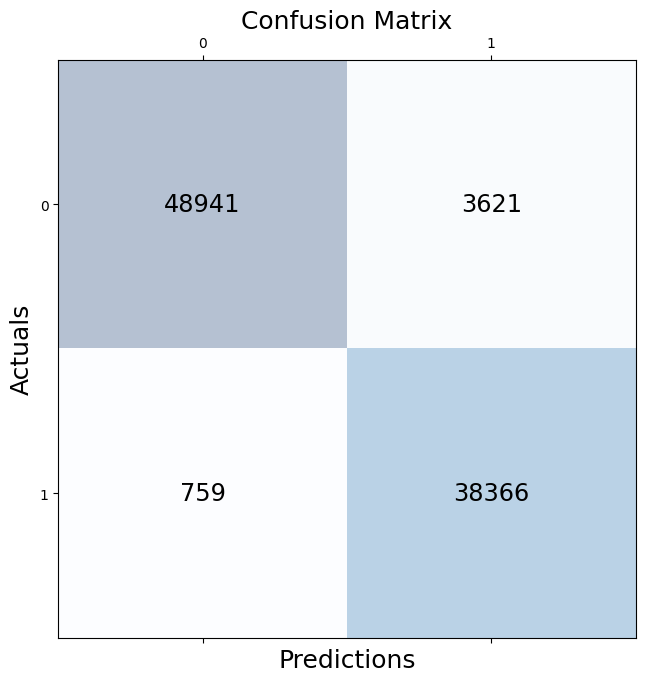

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

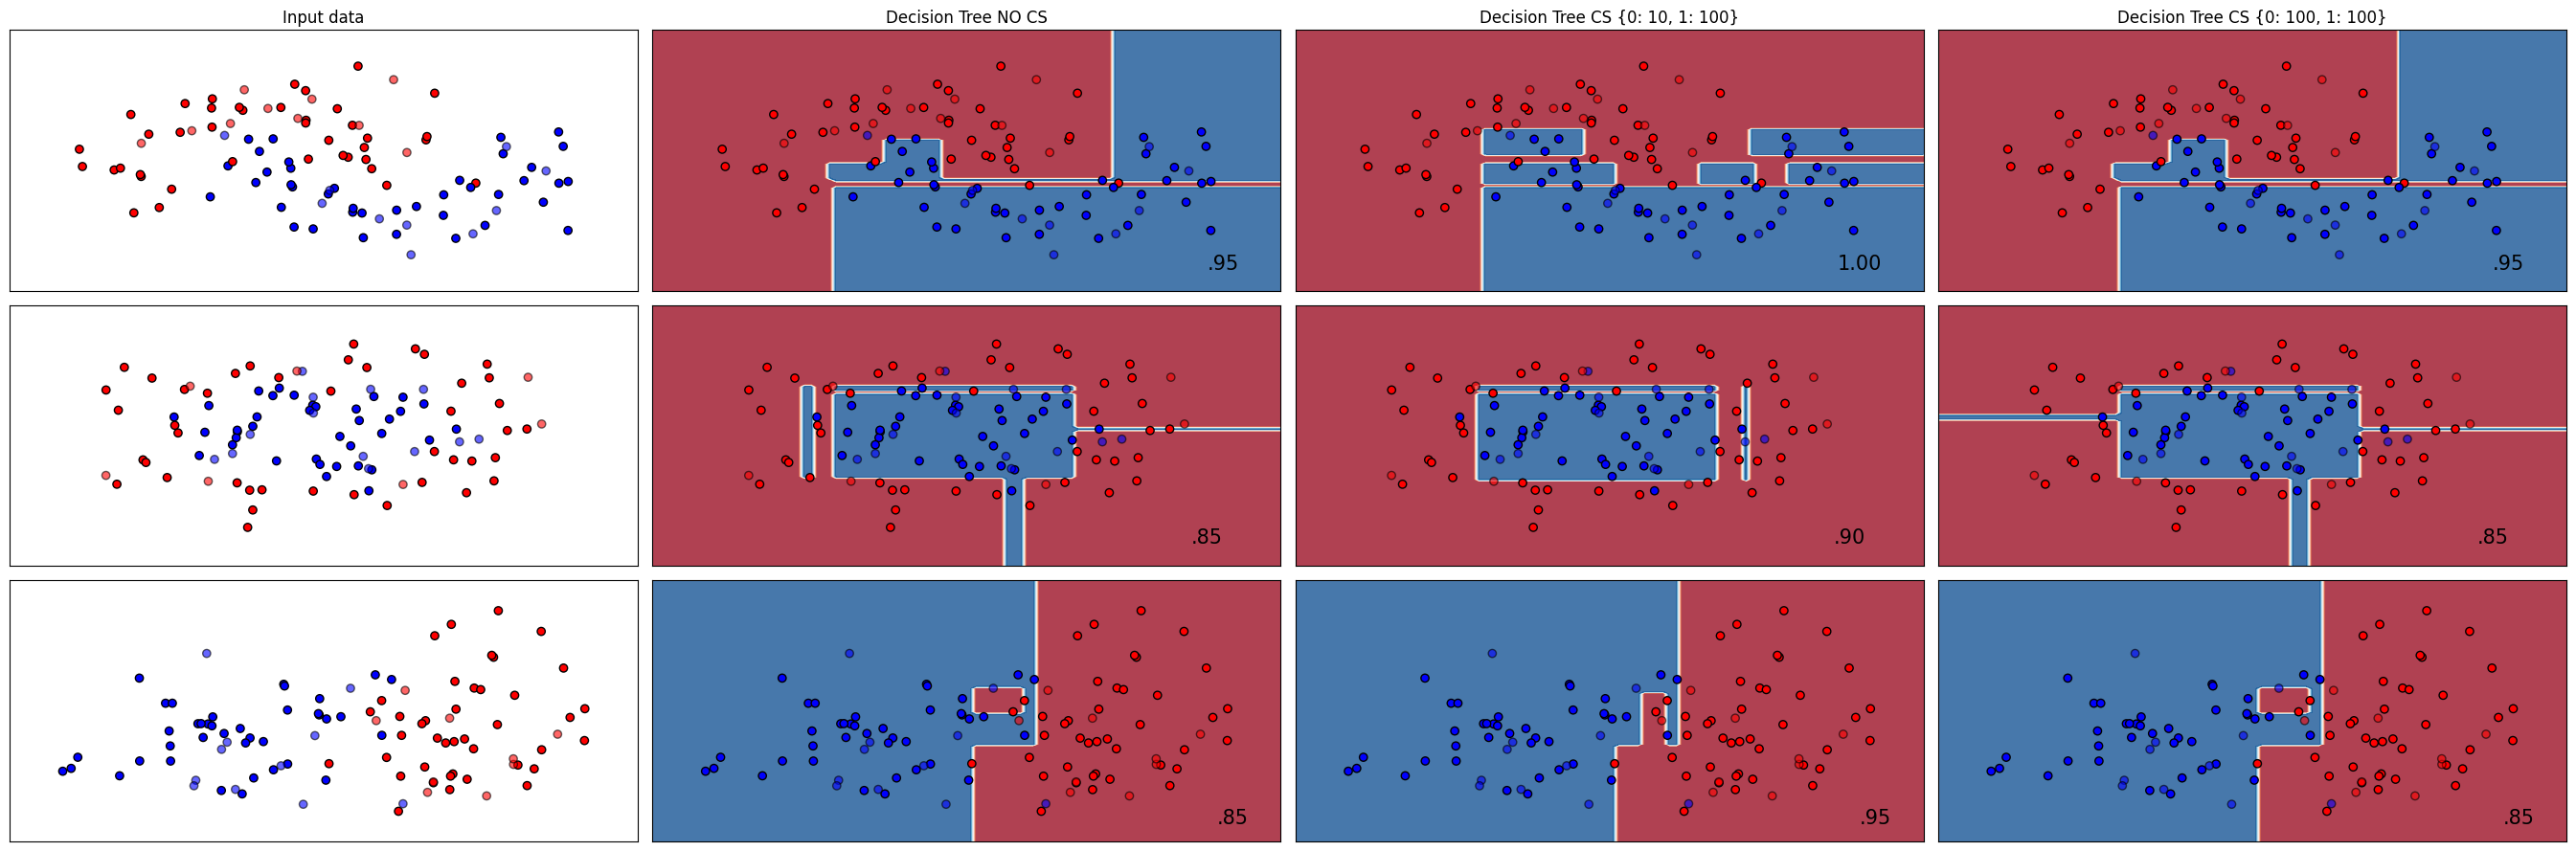

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


names = [
     "Decision Tree NO CS",
     "Decision Tree CS {0: 100, 1: 100}",
    "Decision Tree CS {0: 10, 1: 100}",
]

classifiers = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(class_weight={0: 10, 1: 100}),
    DecisionTreeClassifier(class_weight={0: 100, 1: 100})
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()